In [2347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2348]:
file_path = 'C:\\Users\\Mr.Rafaat\\Downloads\\fintech_data_32_52_22725.csv'

df = pd.read_csv(file_path)

df.head()

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,Yid8XHhlOVx4MWY9VmZceGZiXHhlMlx4OTVceGZkUlx0XH...,Detention Officer,10+ years,RENT,70000.0,NaN,Source Verified,441xx,OH,1810.0,38005.0,10683,Current,3000.0,OH,3000.0,36 months,0.1261,14,18 April 2018,False,Individual,debt_consolidation,Debt consolidation
1,YiJRXHhhZVx4ODNceGNmJ1x4ODl+XHhjYlx4ZmFceGVmXH...,Apprentice Electrician,< 1 year,RENT,28000.0,NaN,Verified,773xx,TX,3202.0,16008.0,37368,Fully Paid,5600.0,TX,5600.0,36 months,0.0789,2,15 October 2015,False,Individual,debt_consolidation,Debt consolidation
2,YidceDg4XHhjOVx4OGJ8XHgwYj85XHhhM1x4ZTJiXHhkYl...,Software Engineer,10+ years,MORTGAGE,108000.0,NaN,Verified,153xx,PA,16934.0,220138.0,267193,Current,40000.0,PA,40000.0,36 months,0.1903,18,17 May 2017,False,Individual,debt_consolidation,Debt consolidation
3,YidceDAyXHg5YVx4Y2RceGJiXHhiYlx4MWZceDlmXHhhYl...,NaN,NaN,MORTGAGE,26000.0,54000.0,Source Verified,400xx,KY,1213.0,18188.0,35442,Current,5300.0,KY,5300.0,36 months,0.1240,8,19 September 2019,False,Joint App,debt_consolidation,Debt consolidation
4,YidceDlmXHgwYzFceGI5XHgwYlx4MWNNVlx4YzFceGEyJj...,MLT Outreach,10+ years,OWN,75000.0,NaN,Not Verified,551xx,MN,13412.0,254821.0,117265,Current,12000.0,MN,12000.0,36 months,0.0749,2,16 December 2016,False,INDIVIDUAL,other,Other


In [2349]:
# renmaing columns 2.2.1

def rename_columns(df):
#     make all cols lower case
    df.columns = df.columns.str.lower()
    # Iterate through the column names and replace space with underscore,
#     using list comprehension
    df.columns = [col.replace(' ', '_') for col in df.columns]
    
rename_columns(df)

df.head()

,customer_id,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
0,Yid8XHhlOVx4MWY9VmZceGZiXHhlMlx4OTVceGZkUlx0XH...,Detention Officer,10+ years,RENT,70000.0,NaN,Source Verified,441xx,OH,1810.0,38005.0,10683,Current,3000.0,OH,3000.0,36 months,0.1261,14,18 April 2018,False,Individual,debt_consolidation,Debt consolidation
1,YiJRXHhhZVx4ODNceGNmJ1x4ODl+XHhjYlx4ZmFceGVmXH...,Apprentice Electrician,< 1 year,RENT,28000.0,NaN,Verified,773xx,TX,3202.0,16008.0,37368,Fully Paid,5600.0,TX,5600.0,36 months,0.0789,2,15 October 2015,False,Individual,debt_consolidation,Debt consolidation
2,YidceDg4XHhjOVx4OGJ8XHgwYj85XHhhM1x4ZTJiXHhkYl...,Software Engineer,10+ years,MORTGAGE,108000.0,NaN,Verified,153xx,PA,16934.0,220138.0,267193,Current,40000.0,PA,40000.0,36 months,0.1903,18,17 May 2017,False,Individual,debt_consolidation,Debt consolidation
3,YidceDAyXHg5YVx4Y2RceGJiXHhiYlx4MWZceDlmXHhhYl...,NaN,NaN,MORTGAGE,26000.0,54000.0,Source Verified,400xx,KY,1213.0,18188.0,35442,Current,5300.0,KY,5300.0,36 months,0.1240,8,19 September 2019,False,Joint App,debt_consolidation,Debt consolidation
4,YidceDlmXHgwYzFceGI5XHgwYlx4MWNNVlx4YzFceGEyJj...,MLT Outreach,10+ years,OWN,75000.0,NaN,Not Verified,551xx,MN,13412.0,254821.0,117265,Current,12000.0,MN,12000.0,36 months,0.0749,2,16 December 2016,False,INDIVIDUAL,other,Other


In [2350]:
df["type"].value_counts()

type
Individual    16918
INDIVIDUAL     8175
Joint App      1813
JOINT            94
DIRECT_PAY       30
Name: count, dtype: int64

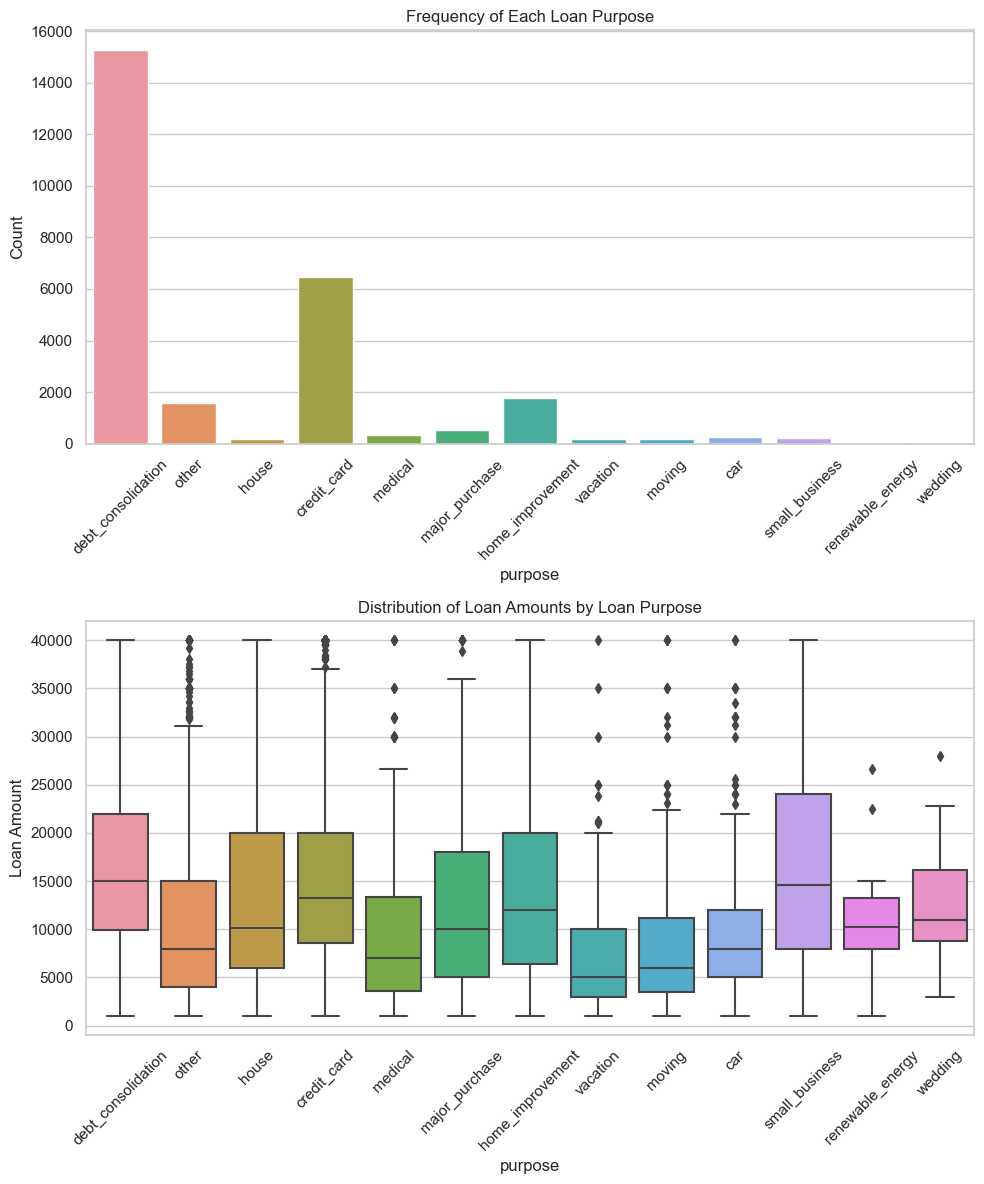

In [2351]:
# Five Questions part
# First Question: What are the most common loan purposes, and how do they relate to loan amounts?


# Set up the figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Bar chart for frequency of loan purpose
sns.countplot(x='purpose', data=df, ax=axes[0])
axes[0].set_title('Frequency of Each Loan Purpose')
axes[0].set_ylabel('Count')
# Rotate x-axis labels for the bar chart
axes[0].tick_params(axis='x', rotation=45)


# Box plot for distribution of loan amounts by loan purpose
sns.boxplot(x='purpose', y='loan_amount', data=df, ax=axes[1])
axes[1].set_title('Distribution of Loan Amounts by Loan Purpose')
axes[1].set_ylabel('Loan Amount')
# Rotate x-axis labels for the box plot
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


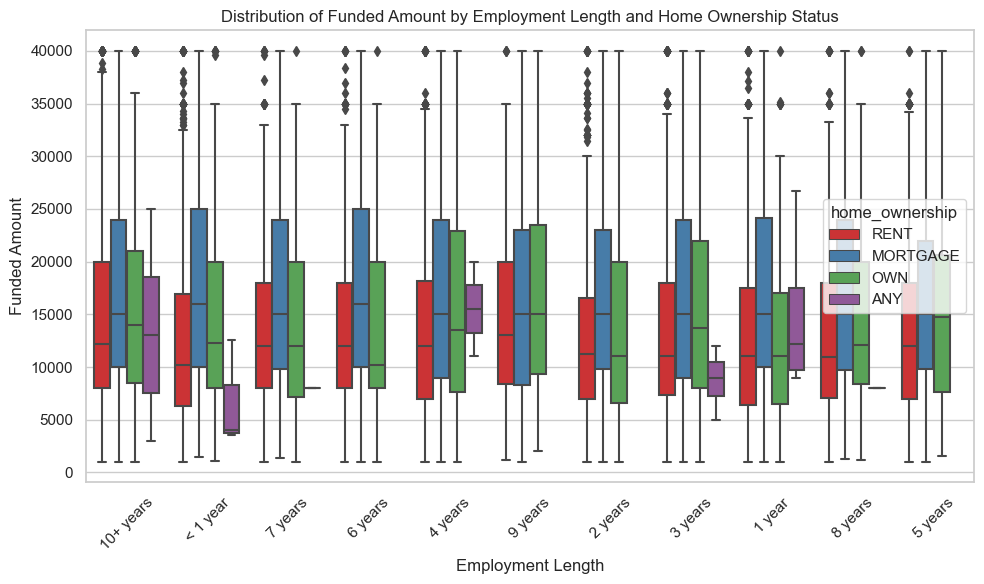

In [2352]:
# Second Question: How does the length of employment (Emp Length) affect the funded loan amount?


# Set up the figure
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x='emp_length', y='loan_amount', hue='home_ownership', data=df, palette='Set1', dodge=True)

# Add titles and labels
plt.title('Distribution of Funded Amount by Employment Length and Home Ownership Status')
plt.xlabel('Employment Length')
plt.ylabel('Funded Amount')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [2353]:
df_tagroba = df.copy()

df_tagroba = df_tagroba.drop('customer_id', axis=1)

df_tagroba.head()


,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
0,Detention Officer,10+ years,RENT,70000.0,NaN,Source Verified,441xx,OH,1810.0,38005.0,10683,Current,3000.0,OH,3000.0,36 months,0.1261,14,18 April 2018,False,Individual,debt_consolidation,Debt consolidation
1,Apprentice Electrician,< 1 year,RENT,28000.0,NaN,Verified,773xx,TX,3202.0,16008.0,37368,Fully Paid,5600.0,TX,5600.0,36 months,0.0789,2,15 October 2015,False,Individual,debt_consolidation,Debt consolidation
2,Software Engineer,10+ years,MORTGAGE,108000.0,NaN,Verified,153xx,PA,16934.0,220138.0,267193,Current,40000.0,PA,40000.0,36 months,0.1903,18,17 May 2017,False,Individual,debt_consolidation,Debt consolidation
3,NaN,NaN,MORTGAGE,26000.0,54000.0,Source Verified,400xx,KY,1213.0,18188.0,35442,Current,5300.0,KY,5300.0,36 months,0.1240,8,19 September 2019,False,Joint App,debt_consolidation,Debt consolidation
4,MLT Outreach,10+ years,OWN,75000.0,NaN,Not Verified,551xx,MN,13412.0,254821.0,117265,Current,12000.0,MN,12000.0,36 months,0.0749,2,16 December 2016,False,INDIVIDUAL,other,Other


In [2354]:
# 2.2.2 [ I Used the loan id as an index for my dataset]

df.reset_index(inplace=True)  # This will move 'loan_id' back to columns
df.set_index('loan_id', inplace=True, drop=True)  # Now set it again
# If an index column appears
if 'index' in df.columns:
    df.drop('index', axis=1, inplace=True)
df

,customer_id,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
loan_id,,,,,,,,,,,,,,,,,,,,,,,
10683,Yid8XHhlOVx4MWY9VmZceGZiXHhlMlx4OTVceGZkUlx0XH...,Detention Officer,10+ years,RENT,70000.0,NaN,Source Verified,441xx,OH,1810.0,38005.0,Current,3000.0,OH,3000.0,36 months,0.1261,14,18 April 2018,False,Individual,debt_consolidation,Debt consolidation
37368,YiJRXHhhZVx4ODNceGNmJ1x4ODl+XHhjYlx4ZmFceGVmXH...,Apprentice Electrician,< 1 year,RENT,28000.0,NaN,Verified,773xx,TX,3202.0,16008.0,Fully Paid,5600.0,TX,5600.0,36 months,0.0789,2,15 October 2015,False,Individual,debt_consolidation,Debt consolidation
267193,YidceDg4XHhjOVx4OGJ8XHgwYj85XHhhM1x4ZTJiXHhkYl...,Software Engineer,10+ years,MORTGAGE,108000.0,NaN,Verified,153xx,PA,16934.0,220138.0,Current,40000.0,PA,40000.0,36 months,0.1903,18,17 May 2017,False,Individual,debt_consolidation,Debt consolidation
35442,YidceDAyXHg5YVx4Y2RceGJiXHhiYlx4MWZceDlmXHhhYl...,NaN,NaN,MORTGAGE,26000.0,54000.0,Source Verified,400xx,KY,1213.0,18188.0,Current,5300.0,KY,5300.0,36 months,0.1240,8,19 September 2019,False,Joint App,debt_consolidation,Debt consolidation
117265,YidceDlmXHgwYzFceGI5XHgwYlx4MWNNVlx4YzFceGEyJj...,MLT Outreach,10+ years,OWN,75000.0,NaN,Not Verified,551xx,MN,13412.0,254821.0,Current,12000.0,MN,12000.0,36 months,0.0749,2,16 December 2016,False,INDIVIDUAL,other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55209,YidzXHhkMSw6aFx4ZDBceGMyXHhlYlx4ZmFceGIzXHhiZl...,NaN,NaN,MORTGAGE,28500.0,NaN,Verified,276xx,NC,329.0,4601.0,Charged Off,7000.0,NC,7000.0,36 months,0.1561,17,14 October 2014,False,INDIVIDUAL,debt_consolidation,Debt consolidation
246620,YidDXHhmOC9ceDEzXHhmM0pVXHhhY1x4ZjNceGNhXHgwNl...,Sales Manager,10+ years,MORTGAGE,180000.0,NaN,Source Verified,074xx,NJ,86736.0,520418.0,Current,30000.0,NJ,30000.0,60 months,0.2235,20,18 October 2018,False,Individual,debt_consolidation,Debt consolidation
6621,YiJyXHhkYypceGQ2XHg5Ny1mQVx4MTdceGFiXHg4ZlQqXH...,claims manager,8 years,MORTGAGE,55000.0,NaN,Not Verified,760xx,TX,32387.0,259097.0,Late (16-30 days),2400.0,TX,2400.0,36 months,0.1561,17,14 June 2014,False,INDIVIDUAL,vacation,Vacation


In [2355]:
# droping duplicates from dataframe

# No duplicated rows exist



print("No duplicated rows exist")

duplicates = df[df.duplicated()]
duplicates

No duplicated rows exist


,customer_id,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
loan_id,,,,,,,,,,,,,,,,,,,,,,,


In [2356]:
# By doing this i made sure to cover and handled all hidden or showed data inconsisty in case of difference in uppercase or lowecase
# point 2.2.3 (Handlling incosistent data)


# This is handling data inconsistency

# I replaced the ANY in home owner ship col with the mode

# print(df["home_ownership"].value_counts())

mode = df.home_ownership.mode()
print(mode)

df["home_ownership"] = df["home_ownership"].replace("ANY","MORTGAGE")
# Important



print(df["type"].value_counts())

# Defined a mapping dictionary to standardize the values
replacement_dict = {
    'Individual': 'individual',
    'INDIVIDUAL': 'individual',
    'Joint App': 'JOINT',
    'JOINT': 'JOINT',
    'DIRECT_PAY': 'DIRECT_PAY'
}

# Replace values using the mapping dictionary
df['type'] = df['type'].replace(replacement_dict)

print(df['type'].value_counts())

def lowercase_all_columns(df):
    """
    Convert all string values in all columns of the DataFrame to lowercase.
    
    """
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is of type object (string)
            df[column] = df[column].str.lower()  # Convert to lowercase
    return df

# Convert all string columns to lowercase
df = lowercase_all_columns(df)

df["state"] = df["state"].str.upper()


# For columns that are identical

check = df["loan_amount"] == df["funded_amount"]
# Count the number of False values
false_count = (~check).sum()  # Negate the boolean Series and sum it

# Print the count of False values
print("Number of False values in check:", false_count)

# So now i can safely drop the column funded_amount as it is same as loan_amount

#_______________________________________________________________________________________________

check2 = df["state"] == df["addr_state"]
# Count the number of False values
false_count = (~check2).sum()  # Negate the boolean Series and sum it

# Print the count of False values
print("Number of False values in check2:", false_count)

# So now i can safely drop the column addr_state as it is same as state

#___________________________________________________________________________________________________

# Column to drop
column_to_drop = 'funded_amount'

# Check if the column exists, and drop it if it does
if column_to_drop in df.columns:
    df = df.drop(columns=[column_to_drop])
    print(f"Column '{column_to_drop}' has been dropped.")
else:
    print(f"Column '{column_to_drop}' does not exist in the DataFrame.")
    
# Column to drop
column_to_drop = 'addr_state'

# Check if the column exists, and drop it if it does
if column_to_drop in df.columns:
    df = df.drop(columns=[column_to_drop])
    print(f"Column '{column_to_drop}' has been dropped.")
else:
    print(f"Column '{column_to_drop}' does not exist in the DataFrame.")
    

# Column to drop
column_to_drop = 'customer_id'

# Check if the column exists, and drop it if it does
if column_to_drop in df.columns:
    df = df.drop(columns=[column_to_drop])
    print(f"Column '{column_to_drop}' has been dropped.")
else:
    print(f"Column '{column_to_drop}' does not exist in the DataFrame.")

# Display the modified DataFrame
df





0    MORTGAGE
Name: home_ownership, dtype: object
type
Individual    16918
INDIVIDUAL     8175
Joint App      1813
JOINT            94
DIRECT_PAY       30
Name: count, dtype: int64
type
individual    25093
JOINT          1907
DIRECT_PAY       30
Name: count, dtype: int64
Number of False values in check: 0
Number of False values in check2: 27030
Column 'funded_amount' has been dropped.
Column 'addr_state' has been dropped.
Column 'customer_id' has been dropped.


,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
loan_id,,,,,,,,,,,,,,,,,,,,
10683,detention officer,10+ years,rent,70000.0,NaN,source verified,441xx,1810.0,38005.0,current,3000.0,OH,36 months,0.1261,14,18 april 2018,False,individual,debt_consolidation,debt consolidation
37368,apprentice electrician,< 1 year,rent,28000.0,NaN,verified,773xx,3202.0,16008.0,fully paid,5600.0,TX,36 months,0.0789,2,15 october 2015,False,individual,debt_consolidation,debt consolidation
267193,software engineer,10+ years,mortgage,108000.0,NaN,verified,153xx,16934.0,220138.0,current,40000.0,PA,36 months,0.1903,18,17 may 2017,False,individual,debt_consolidation,debt consolidation
35442,NaN,NaN,mortgage,26000.0,54000.0,source verified,400xx,1213.0,18188.0,current,5300.0,KY,36 months,0.1240,8,19 september 2019,False,joint,debt_consolidation,debt consolidation
117265,mlt outreach,10+ years,own,75000.0,NaN,not verified,551xx,13412.0,254821.0,current,12000.0,MN,36 months,0.0749,2,16 december 2016,False,individual,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55209,NaN,NaN,mortgage,28500.0,NaN,verified,276xx,329.0,4601.0,charged off,7000.0,NC,36 months,0.1561,17,14 october 2014,False,individual,debt_consolidation,debt consolidation
246620,sales manager,10+ years,mortgage,180000.0,NaN,source verified,074xx,86736.0,520418.0,current,30000.0,NJ,60 months,0.2235,20,18 october 2018,False,individual,debt_consolidation,debt consolidation
6621,claims manager,8 years,mortgage,55000.0,NaN,not verified,760xx,32387.0,259097.0,late (16-30 days),2400.0,TX,36 months,0.1561,17,14 june 2014,False,individual,vacation,vacation


In [2357]:
df_cleaned = df.copy()

In [2358]:
missing_values_dict = {'column':[], 'original':[], 'imputed':[]}
#outlier_values_dict = {'column':[], 'original':[], 'imputed':[]}

In [2359]:
# Calculating sum of null entries and percentage of null entries
sum_null = df.isnull().mean()*100

sum_null

emp_title               8.816130
emp_length              6.992231
home_ownership          0.000000
annual_inc              0.000000
annual_inc_joint       92.944876
verification_status     0.000000
zip_code                0.000000
avg_cur_bal             0.000000
tot_cur_bal             0.000000
loan_status             0.000000
loan_amount             0.000000
state                   0.000000
term                    0.000000
int_rate                4.605993
grade                   0.000000
issue_date              0.000000
pymnt_plan              0.000000
type                    0.000000
purpose                 0.000000
description             0.791713
dtype: float64

In [2360]:
# Fot the column emp_title and emp_length: the data missing is only 8.82% i think data was missed completely at random (MCAR)
# i will impute by the mode 

mode_df = df.emp_title.mode()[0]
print("The mode of emp_title is:",mode_df)
df['emp_title'] = df.emp_title.fillna(mode_df)
# check 
zero = df.isnull().sum()['emp_title']
print("Check for emp_title =",zero)

mode_df = df.emp_length.mode()[0]
print("The mode of emp_length is:",mode_df)
df['emp_length'] = df.emp_length.fillna(mode_df)
# check 
zero = df.isnull().sum()['emp_length']
print("Check for emp_length =",zero)

#___________________________________________________________________________

# For the description column the data is not recorded by the customers as it is an additional data
# so the data is missing completely not at random (MNAR)
# i will handle this data by dropping the column from the data

# Column to drop
column_to_drop = 'description'

# Check if the column exists, and drop it if it does
if column_to_drop in df.columns:
    df = df.drop(columns=[column_to_drop])
    print(f"Column '{column_to_drop}' has been dropped.")
else:
    print(f"Column '{column_to_drop}' does not exist in the DataFrame.")
    
print("------------------------------------------------------------------")     

  # Store the median in the dictionary
missing_values_dict['column'].append("emp_title")
missing_values_dict['original'].append(np.nan)  # Missing value
missing_values_dict['imputed'].append("teacher")  # Append the replacement

missing_values_dict['column'].append("emp_length")
missing_values_dict['original'].append(np.nan)  # Missing value
missing_values_dict['imputed'].append("10+ years")  # Append the replacement
            


The mode of emp_title is: teacher
Check for emp_title = 0
The mode of emp_length is: 10+ years
Check for emp_length = 0
Column 'description' has been dropped.
------------------------------------------------------------------


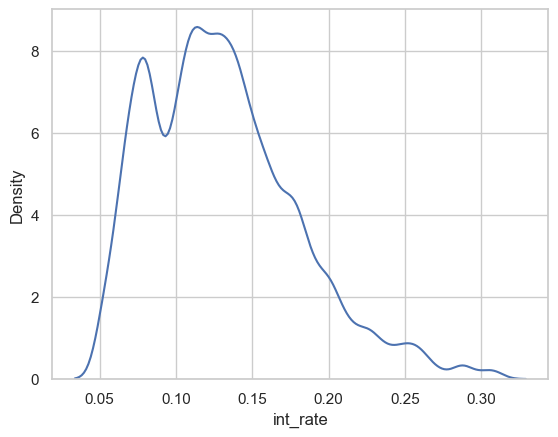

the sum of Nan values after handling = 0


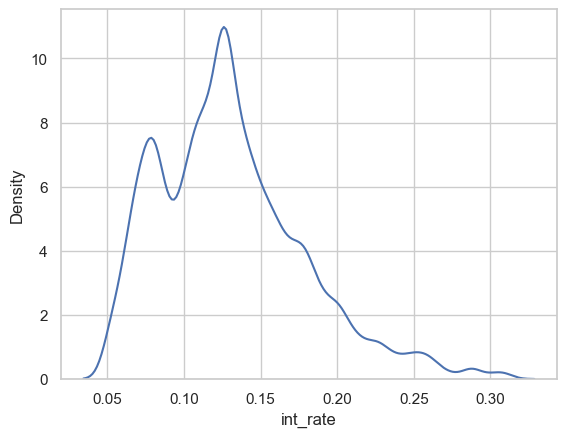

In [2361]:
# Cont. on missing data

sns.kdeplot(df["int_rate"])
plt.show()

# For int_rate column data missing is 4.61% data was not recorded (MCAR) missing completely at random
# Since that int_rate is not near a normal distribution 
# I will use the median to replace NaN values 

df["int_rate"] = df["int_rate"].fillna(value=df["int_rate"].median())

# check
print("the sum of Nan values after handling =",df["int_rate"].isna().sum())

missing_values_dict['column'].append("int_rate")
missing_values_dict['original'].append(np.nan)  # Missing value
missing_values_dict['imputed'].append(df["int_rate"].median())  # Append the replacement

sns.kdeplot(df["int_rate"])
plt.show()

#_______________________________________________________________________________________________



In [2362]:
missing_values_df = pd.DataFrame(missing_values_dict)
missing_values_df

,column,original,imputed
0,emp_title,NaN,teacher
1,emp_length,NaN,10+ years
2,int_rate,NaN,0.1261


type
individual    92.833888
joint          7.055124
direct_pay     0.110988
Name: count, dtype: float64
The percentage of nan values in annual income joint = 92.944876063633


<Figure size 800x600 with 0 Axes>

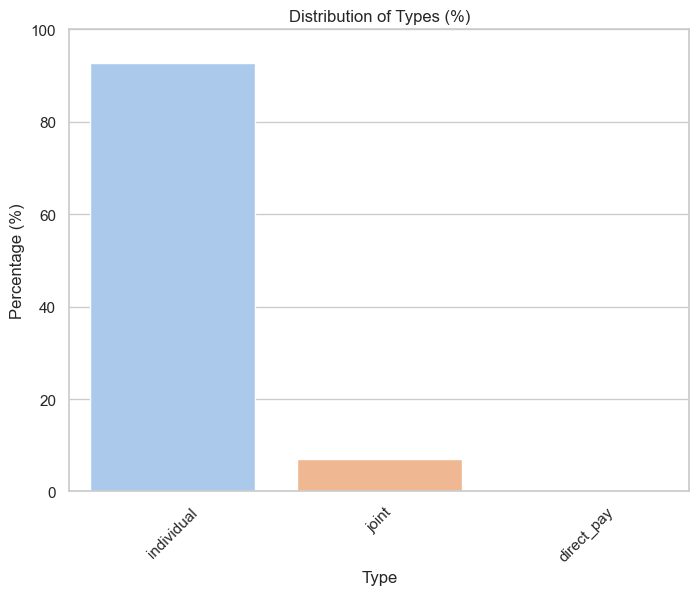

Column 'annual_inc_joint' has been dropped.


In [2363]:
# For the annual_inc_joint column nearly 93% of data is nan values 

print((df["type"].value_counts()/len(df))*100)
print("The percentage of nan values in annual income joint =",(df["annual_inc_joint"].isna().sum()/len(df))*100)
# Maybe because the type of loans that are joint is only 7% indicating a reasnoable loss of data in the annual_inc_joint column
plt.figure(figsize=(8,6))

# Count the occurrences of each type
type_counts = df['type'].value_counts(normalize=True) * 100  # Get percentages

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')

# Add titles and labels
plt.title('Distribution of Types (%)')
plt.xlabel('Type')
plt.ylabel('Percentage (%)')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%
plt.show()

# Data is missing not at random (MNR)
# So till now i will remove the annual_inc_joint from the dataset

# Column to drop
column_to_drop = 'annual_inc_joint'

# Check if the column exists, and drop it if it does
if column_to_drop in df.columns:
    df = df.drop(columns=[column_to_drop])
    print(f"Column '{column_to_drop}' has been dropped.")
else:
    print(f"Column '{column_to_drop}' does not exist in the DataFrame.")



In [2364]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Now call df.info()
df.info()

# To reset the df.info() 
# pd.reset_option('display.max_columns')

<class 'pandas.core.frame.DataFrame'>
Index: 27030 entries, 10683 to 113865
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   emp_title            27030 non-null  object 
 1   emp_length           27030 non-null  object 
 2   home_ownership       27030 non-null  object 
 3   annual_inc           27030 non-null  float64
 4   verification_status  27030 non-null  object 
 5   zip_code             27030 non-null  object 
 6   avg_cur_bal          27030 non-null  float64
 7   tot_cur_bal          27030 non-null  float64
 8   loan_status          27030 non-null  object 
 9   loan_amount          27030 non-null  float64
 10  state                27030 non-null  object 
 11  term                 27030 non-null  object 
 12  int_rate             27030 non-null  float64
 13  grade                27030 non-null  int64  
 14  issue_date           27030 non-null  object 
 15  pymnt_plan           27030 non-null 

In [2365]:
# Detecting & Handling Outliers 

# Function to replace column by its median and give me also a dictionary for the medians
def replace_outliers_with_median(df, columns):
    # Create a copy of the original DataFrame
    modified_df = df.copy()
    outliers_dict = {'column':[], 'original':[], 'imputed':[]}
    
    for column in columns:
        # Calculate median, mean, and standard deviation
        # For numeric types, use median for imputation
        median = modified_df[column].median()
        mean = modified_df[column].mean()
        std_dev = modified_df[column].std()
            
        # Define cutoff values for outlier detection
        cutoff_pos = mean + 3 * std_dev
        cutoff_neg = mean - 3 * std_dev
            
        # Create a condition series for outliers
        condition_series = (modified_df[column] > cutoff_pos) | (modified_df[column] < cutoff_neg)
            
        # Store the median in the dictionary
        outliers_dict['column'].append(column)
        outliers_dict['original'].append(modified_df[column].where(condition_series).dropna().tolist())  # Original outlier values
        outliers_dict['imputed'].append(median)  # Append the median
            
        # Replace outliers with the median
        modified_df[column] = np.where(condition_series, median, modified_df[column])
    
    return modified_df, outliers_dict



In [2366]:
df.describe()

,annual_inc,avg_cur_bal,tot_cur_bal,loan_amount,int_rate,grade
count,2.703000e+04,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000
mean,7.934952e+04,13769.372068,1.450017e+05,15370.158158,0.130703,10.947725
std,8.396965e+04,17014.287258,1.621338e+05,9473.905161,0.047914,6.334332
min,2.000000e+02,0.000000,0.000000e+00,1000.000000,0.053100,1.000000
25%,4.700000e+04,3082.000000,2.955875e+04,8000.000000,0.094900,6.000000
50%,6.600000e+04,7426.500000,8.074850e+04,13000.000000,0.126100,10.000000
75%,9.500000e+04,18986.000000,2.162798e+05,20168.750000,0.156100,15.000000
max,7.141778e+06,336219.000000,2.343176e+06,40000.000000,0.309900,35.000000


The skew = 46.6124700433935


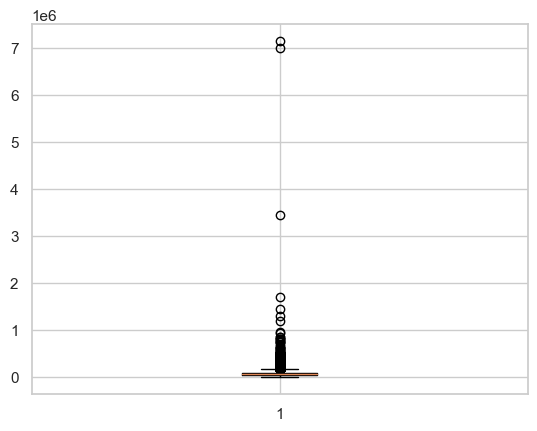

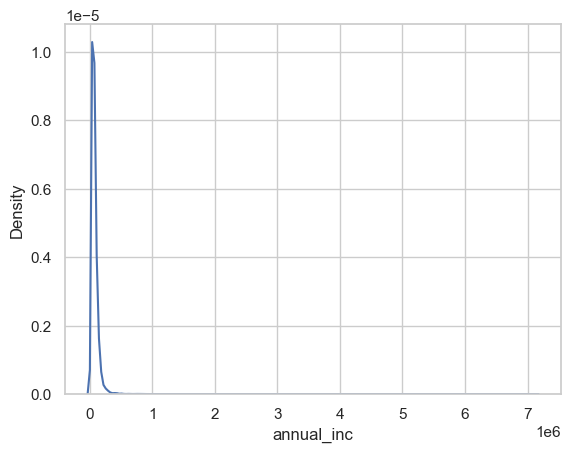

The IQR = 48000.0
Lower = -25000.0 Upper = 167000.0


In [2367]:
print("The skew =",df["annual_inc"].skew())

plt.boxplot(df.annual_inc)
plt.show()
sns.kdeplot(df.annual_inc)
plt.show()

Q1 = df.annual_inc.quantile(0.25)
Q3 = df.annual_inc.quantile(0.75)
IQR = Q3 - Q1
print("The IQR =",IQR)

cut_off = IQR * 1.5
lower = Q1 - cut_off
upper =  Q3 + cut_off
print("Lower =",lower,"Upper =",upper)

In [2368]:
df1 = df[df['annual_inc']> upper]
df2 = df[df['annual_inc'] < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

Total number of outliers are 1306


In [2369]:
# For numeric types, use median for imputation
median = df["annual_inc"].median()       
mean = df["annual_inc"].mean()
std_dev = df["annual_inc"].std()
            
# Define cutoff values for outlier detection
cutoff_pos = mean + 3 * std_dev
cutoff_neg = mean - 3 * std_dev
            
# Create a condition series for outliers
condition_series = (df["annual_inc"] > cutoff_pos) | (df["annual_inc"] < cutoff_neg)

print(f"Number of outliers =",condition_series.sum())


Number of outliers = 149


The skew = 1.7386126882984427


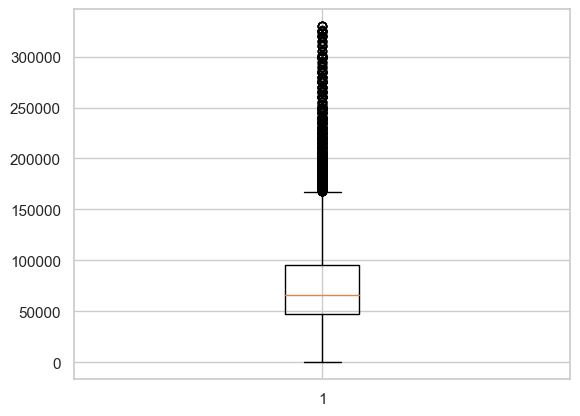

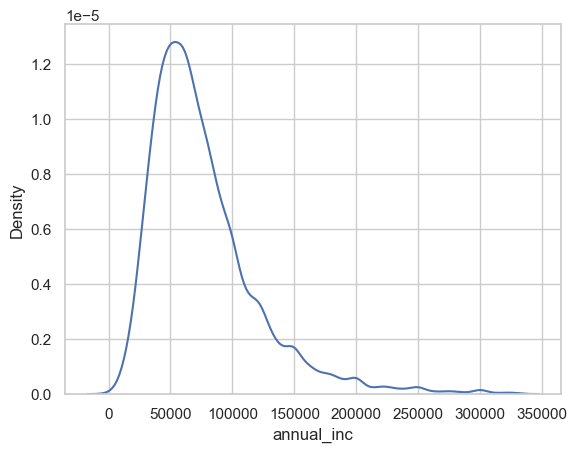

'\n\nfloor = df[\'int_rate\'].quantile(0.10)\ncap = df[\'int_rate\'].quantile(0.90)\ndf2 = df.copy()\ndf2["int_rate"] = np.where(df2["int_rate"] <floor, floor,df2[\'int_rate\'])\ndf2["int_rate"] = np.where(df2["int_rate"] >cap,cap,df2[\'int_rate\'])\nprint("The skew =",df2["int_rate"].skew())\n\nplt.boxplot(df2.int_rate)\nplt.show()\nsns.kdeplot(df2.int_rate)\nplt.show()\n\n'

In [2370]:
"""

df_IQR = df[(df['annual_inc'] < upper) & (df['annual_inc'] > lower)]
df_IQR.shape

"""
#___________________________________________________________________________________


df1 = df.copy()
median = df.annual_inc.median()
cutoff_pos = df.annual_inc.mean() + df.annual_inc.std() * 3
cutoff_neg = df.annual_inc.mean() - df.annual_inc.std() * 3
condition_series = ((df.annual_inc > cutoff_pos) | (df.annual_inc < cutoff_neg))
df1["annual_inc"] = np.where(condition_series, median,df1['annual_inc'])
print("The skew =",df1["annual_inc"].skew())

plt.boxplot(df1.annual_inc)
plt.show()
sns.kdeplot(df1.annual_inc)
plt.show()



#____________________________________________________________________________________________________

"""

floor = df['int_rate'].quantile(0.10)
cap = df['int_rate'].quantile(0.90)
df2 = df.copy()
df2["int_rate"] = np.where(df2["int_rate"] <floor, floor,df2['int_rate'])
df2["int_rate"] = np.where(df2["int_rate"] >cap,cap,df2['int_rate'])
print("The skew =",df2["int_rate"].skew())

plt.boxplot(df2.int_rate)
plt.show()
sns.kdeplot(df2.int_rate)
plt.show()

"""

In [2371]:
df_before_outlier = df.copy()

df_after_outlier , outlier_values_df = replace_outliers_with_median(df,['annual_inc','avg_cur_bal','tot_cur_bal'])

outlier_values_df = pd.DataFrame(outlier_values_df)

print("The skew =",df_after_outlier["annual_inc"].skew())
display(df_after_outlier)
outlier_values_df

The skew = 1.7386126882984427


,emp_title,emp_length,home_ownership,annual_inc,verification_status,zip_code,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,term,int_rate,grade,issue_date,pymnt_plan,type,purpose
loan_id,,,,,,,,,,,,,,,,,,
10683,detention officer,10+ years,rent,70000.0,source verified,441xx,1810.0,38005.0,current,3000.0,OH,36 months,0.1261,14,18 april 2018,False,individual,debt_consolidation
37368,apprentice electrician,< 1 year,rent,28000.0,verified,773xx,3202.0,16008.0,fully paid,5600.0,TX,36 months,0.0789,2,15 october 2015,False,individual,debt_consolidation
267193,software engineer,10+ years,mortgage,108000.0,verified,153xx,16934.0,220138.0,current,40000.0,PA,36 months,0.1903,18,17 may 2017,False,individual,debt_consolidation
35442,teacher,10+ years,mortgage,26000.0,source verified,400xx,1213.0,18188.0,current,5300.0,KY,36 months,0.1240,8,19 september 2019,False,joint,debt_consolidation
117265,mlt outreach,10+ years,own,75000.0,not verified,551xx,13412.0,254821.0,current,12000.0,MN,36 months,0.0749,2,16 december 2016,False,individual,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55209,teacher,10+ years,mortgage,28500.0,verified,276xx,329.0,4601.0,charged off,7000.0,NC,36 months,0.1561,17,14 october 2014,False,individual,debt_consolidation
246620,sales manager,10+ years,mortgage,180000.0,source verified,074xx,7426.5,520418.0,current,30000.0,NJ,60 months,0.2235,20,18 october 2018,False,individual,debt_consolidation
6621,claims manager,8 years,mortgage,55000.0,not verified,760xx,32387.0,259097.0,late (16-30 days),2400.0,TX,36 months,0.1561,17,14 june 2014,False,individual,vacation


,column,original,imputed
0,annual_inc,"[450000.0, 1450000.0, 345000.0, 800000.0, 4400...",66000.0
1,avg_cur_bal,"[70937.0, 78502.0, 73684.0, 90309.0, 71515.0, ...",7426.5
2,tot_cur_bal,"[818841.0, 1023280.0, 715810.0, 767624.0, 1161...",80748.5


In [2372]:
# Data trasnformation is done here

# Month column

df = df_after_outlier.copy()

# Step 1: Convert 'issue_date' to datetime type
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d %B %Y')

# Step 2: Create a 'Month number' column
df['month_number'] = df['issue_date'].dt.month  # Extract month number (1-12)

# Step 3: Create a 'Day number' column
df['day_number'] = df['issue_date'].dt.day

# Step 4: Create a 'Year number' column
df['year_number'] = df['issue_date'].dt.year

# I will remove the issue_date column

# Column to drop emp_title
column_to_drop = 'issue_date'

# Check if the column exists, and drop it if it does
if column_to_drop in df.columns:
    df = df.drop(columns=[column_to_drop])
    print(f"Column '{column_to_drop}' has been dropped.")
else:
    print(f"Column '{column_to_drop}' does not exist in the DataFrame.")



#__________________________________________________________________________________



# Create the 'salary_can_cover' column
df['salary_can_cover'] = df['annual_inc'] >= df['loan_amount']

#________________________________________________________________________________


# Letter grade column

# Define a function to map grade to letter
def map_grade_to_letter(grade):
    if 1 <= grade <= 5:
        return 'A'
    elif 6 <= grade <= 10:
        return 'B'
    elif 11 <= grade <= 15:
        return 'C'
    elif 16 <= grade <= 20:
        return 'D'
    elif 21 <= grade <= 25:
        return 'E'
    elif 26 <= grade <= 30:
        return 'F'
    elif 31 <= grade <= 35:
        return 'G'
    return None  

# Apply the function to create the 'letter_grade' column
df['letter_grade'] = df['grade'].apply(map_grade_to_letter)

# Display the modified DataFrame
df.head()

#______________________________________________________________________

# Installment per month column

def installment(row):
    p = row['loan_amount']
    r = row['int_rate'] / 12  # Monthly interest rate
    n = int(row['term'].split()[0])  # Extract the numeric part of the term

    if r == 0:  # Handle zero interest rate case
        return p / n  # If no interest, simply divide loan amount by number of months

    # Monthly installment formula
    m = p * r * ((1 + r) ** n) / (((1 + r) ** n) - 1)
    return m

# Apply the function to each row
df['installment_per_month'] = df.apply(installment, axis=1)

# Display the modified DataFrame
df

#______________________________________________________________________________











Column 'issue_date' has been dropped.


,emp_title,emp_length,home_ownership,annual_inc,verification_status,zip_code,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,term,int_rate,grade,pymnt_plan,type,purpose,month_number,day_number,year_number,salary_can_cover,letter_grade,installment_per_month
loan_id,,,,,,,,,,,,,,,,,,,,,,,
10683,detention officer,10+ years,rent,70000.0,source verified,441xx,1810.0,38005.0,current,3000.0,OH,36 months,0.1261,14,False,individual,debt_consolidation,4,18,2018,True,C,100.519232
37368,apprentice electrician,< 1 year,rent,28000.0,verified,773xx,3202.0,16008.0,fully paid,5600.0,TX,36 months,0.0789,2,False,individual,debt_consolidation,10,15,2015,True,A,175.199613
267193,software engineer,10+ years,mortgage,108000.0,verified,153xx,16934.0,220138.0,current,40000.0,PA,36 months,0.1903,18,False,individual,debt_consolidation,5,17,2017,True,D,1466.847588
35442,teacher,10+ years,mortgage,26000.0,source verified,400xx,1213.0,18188.0,current,5300.0,KY,36 months,0.1240,8,False,joint,debt_consolidation,9,19,2019,True,B,177.050112
117265,mlt outreach,10+ years,own,75000.0,not verified,551xx,13412.0,254821.0,current,12000.0,MN,36 months,0.0749,2,False,individual,other,12,16,2016,True,A,373.219508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55209,teacher,10+ years,mortgage,28500.0,verified,276xx,329.0,4601.0,charged off,7000.0,NC,36 months,0.1561,17,False,individual,debt_consolidation,10,14,2014,True,D,244.753549
246620,sales manager,10+ years,mortgage,180000.0,source verified,074xx,7426.5,520418.0,current,30000.0,NJ,60 months,0.2235,20,False,individual,debt_consolidation,10,18,2018,True,D,834.548341
6621,claims manager,8 years,mortgage,55000.0,not verified,760xx,32387.0,259097.0,late (16-30 days),2400.0,TX,36 months,0.1561,17,False,individual,vacation,6,14,2014,True,D,83.915503


In [2373]:
print("The skew =",df["annual_inc"].skew())

The skew = 1.7386126882984427


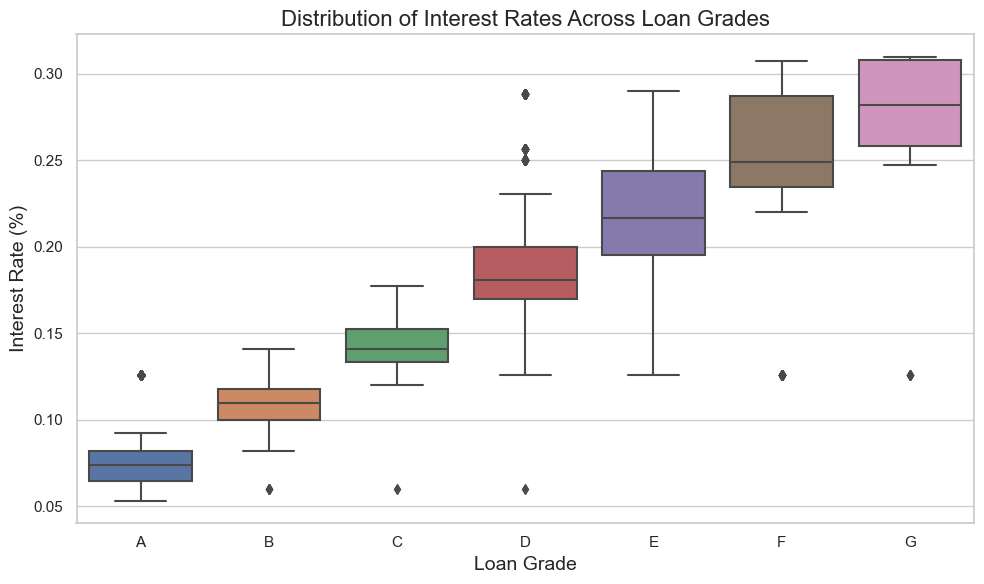

As seen here the when the interset rate increase the risk level (letter grade) becomes less creditworthy


In [2374]:
# Question 3: What is the distribution of interest rates across different loan grades (A-G)?

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='letter_grade', y='int_rate', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Set the title and labels
plt.title('Distribution of Interest Rates Across Loan Grades', fontsize=16)
plt.xlabel('Loan Grade', fontsize=14)
plt.ylabel('Interest Rate (%)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

print("As seen here the when the interset rate increase the risk level (letter grade) becomes less creditworthy")

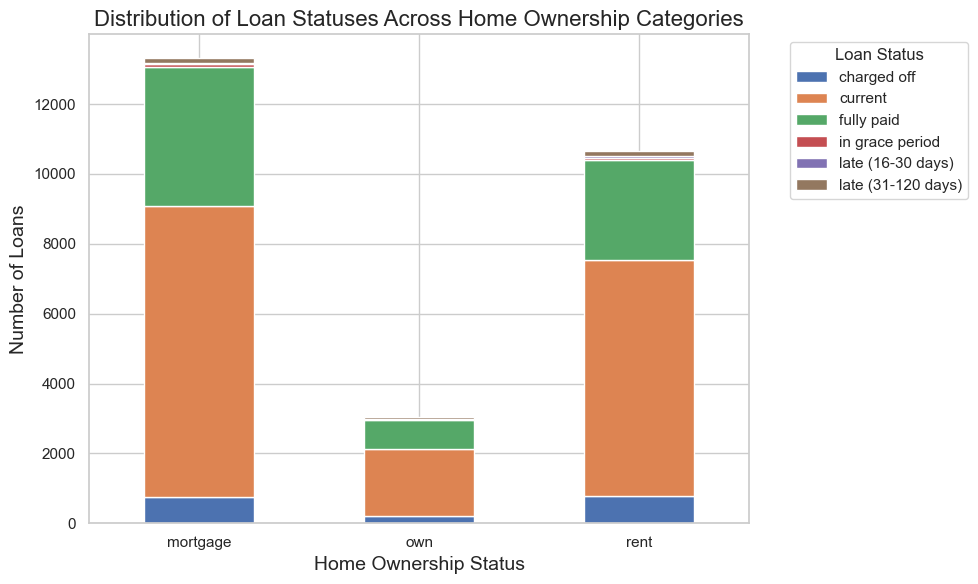

In [2375]:
# Question 4: Is there a relationship between home ownership status and loan status (e.g., fully paid, charged off, current)?

# Create a crosstab for home ownership and loan status
ct = pd.crosstab(df['home_ownership'], df['loan_status'])

# Create a stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Distribution of Loan Statuses Across Home Ownership Categories', fontsize=16)
plt.xlabel('Home Ownership Status', fontsize=14)
plt.ylabel('Number of Loans', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

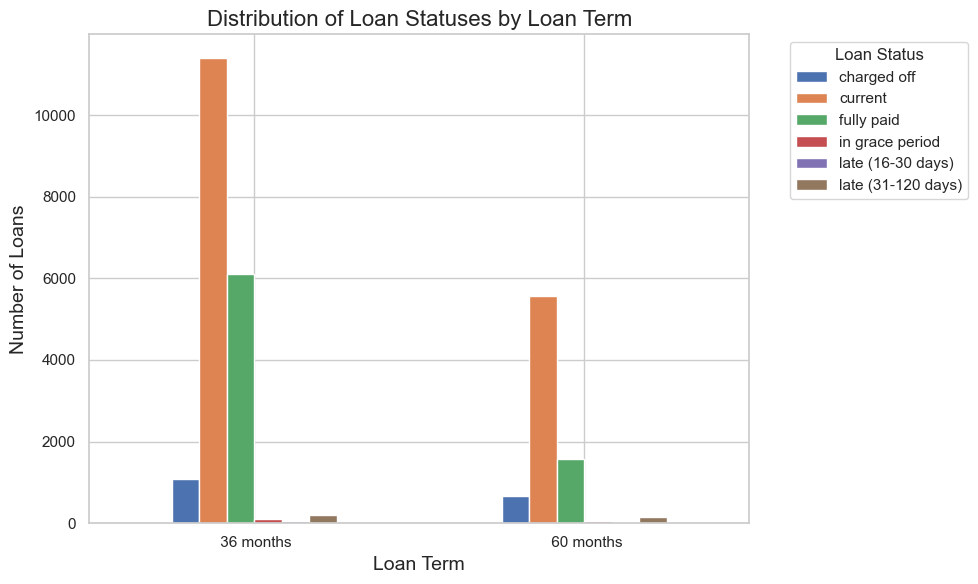

In [2376]:
# Question 5: How do total current balance (Tot Cur Bal) and average current balance (Avg Cur Bal) vary among customers in different states?

# Create a crosstab for loan term and loan status
ct = pd.crosstab(df['term'], df['loan_status'])

# Create a grouped bar chart
ct.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title('Distribution of Loan Statuses by Loan Term', fontsize=16)
plt.xlabel('Loan Term', fontsize=14)
plt.ylabel('Number of Loans', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [2377]:
# Column to drop emp_title
column_to_drop = 'emp_title'

# Check if the column exists, and drop it if it does
if column_to_drop in df.columns:
    df = df.drop(columns=[column_to_drop])
    print(f"Column '{column_to_drop}' has been dropped.")
else:
    print(f"Column '{column_to_drop}' does not exist in the DataFrame.")

Column 'emp_title' has been dropped.


In [2378]:
df.head()

,emp_length,home_ownership,annual_inc,verification_status,zip_code,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,term,int_rate,grade,pymnt_plan,type,purpose,month_number,day_number,year_number,salary_can_cover,letter_grade,installment_per_month
loan_id,,,,,,,,,,,,,,,,,,,,,,
10683,10+ years,rent,70000.0,source verified,441xx,1810.0,38005.0,current,3000.0,OH,36 months,0.1261,14,False,individual,debt_consolidation,4,18,2018,True,C,100.519232
37368,< 1 year,rent,28000.0,verified,773xx,3202.0,16008.0,fully paid,5600.0,TX,36 months,0.0789,2,False,individual,debt_consolidation,10,15,2015,True,A,175.199613
267193,10+ years,mortgage,108000.0,verified,153xx,16934.0,220138.0,current,40000.0,PA,36 months,0.1903,18,False,individual,debt_consolidation,5,17,2017,True,D,1466.847588
35442,10+ years,mortgage,26000.0,source verified,400xx,1213.0,18188.0,current,5300.0,KY,36 months,0.1240,8,False,joint,debt_consolidation,9,19,2019,True,B,177.050112
117265,10+ years,own,75000.0,not verified,551xx,13412.0,254821.0,current,12000.0,MN,36 months,0.0749,2,False,individual,other,12,16,2016,True,A,373.219508


In [2379]:
# Function to encode categorical attributes in a given dataset as numbers

# For Label Encoding
from sklearn import preprocessing

def number_encode_features(df):
    result = df.copy() # take a copy of the dataframe
    for column in result.columns:
        if result.dtypes[column] == object: # if attribute is categorical
            # Apply LabelEncoder method to attribute
            # fit will infer the number of numerical values needed by counting the number of categories
            # then transform will replace each category with its numerical counterpart
            result[column] = preprocessing.LabelEncoder().fit_transform(result[column])
    return result


# Function to encode specific categorical attributes in a given dataset as numbers
def number_encode_features_columns(df, columns_to_encode):
    result = df.copy()  # Take a copy of the DataFrame
    for column in columns_to_encode:
        # if column in result.columns and result.dtypes[column] == object:  # Check if column exists and is categorical
        #     # Apply LabelEncoder method to attribute
            result[column] = preprocessing.LabelEncoder().fit_transform(result[column])
    return result


# Function to encode specific columns by hot encoding
def one_hot_encode_columns(df, columns_to_encode, drop_first=False):
    # Copy the original data
    encoded_df = df.copy()
    
    # One-hot encode only the specified categorical columns
    new_categorical_subset = pd.get_dummies(encoded_df[columns_to_encode], drop_first=drop_first)
    
    # Combine the numeric and one-hot encoded categorical DataFrames
    # Keep all original columns except the ones that were encoded
    encoded_df = pd.concat([encoded_df.drop(columns=columns_to_encode), new_categorical_subset], axis=1)
    
    return encoded_df

In [2380]:
# Encoding is done here (How to deal with the issue_date column?)

df_encoded = df.copy()


# For the columns (emp_title emp_length zip_code state issue_date letter_grade)
# I will do the label encoding because of the cardinality of the variables to not add a lot of columns the data will change from 
# object to int
print(df_encoded.info())

df_encoded = number_encode_features_columns(df,["zip_code","state","purpose","letter_grade",'term'])

#______________________________________________________________________________________________________________________________

# For the columns (home_ownership verfication_status term type)
# I will perform the one hot encoding because the cardinality in these columns is very low the data will change from
# Object to boolean and add addition of columns

# Specify columns to encode and the target column
columns_to_encode = ['home_ownership',"loan_status",'verification_status','type']

df_encoded = one_hot_encode_columns(df_encoded,columns_to_encode)



# replacing the emp length from object to corresponding years (emp_length)
df_encoded['emp_length'] = df_encoded['emp_length'].replace("< 1 year",0)
df_encoded['emp_length'] = df_encoded['emp_length'].replace("10+ years",10)
df_encoded['emp_length'] = df_encoded['emp_length'].replace("1 year",1)
df_encoded['emp_length'] = df_encoded['emp_length'].replace("2 years",2)
df_encoded['emp_length'] = df_encoded['emp_length'].replace("3 years",3)
df_encoded['emp_length'] = df_encoded['emp_length'].replace("4 years",4)
df_encoded['emp_length'] = df_encoded['emp_length'].replace("5 years",5)
df_encoded['emp_length'] = df_encoded['emp_length'].replace("6 years",6)
df_encoded['emp_length'] = df_encoded['emp_length'].replace("7 years",7)
df_encoded['emp_length'] = df_encoded['emp_length'].replace("8 years",8)
df_encoded['emp_length'] = df_encoded['emp_length'].replace("9 years",9)


display(df)
df_encoded


<class 'pandas.core.frame.DataFrame'>
Index: 27030 entries, 10683 to 113865
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   emp_length             27030 non-null  object 
 1   home_ownership         27030 non-null  object 
 2   annual_inc             27030 non-null  float64
 3   verification_status    27030 non-null  object 
 4   zip_code               27030 non-null  object 
 5   avg_cur_bal            27030 non-null  float64
 6   tot_cur_bal            27030 non-null  float64
 7   loan_status            27030 non-null  object 
 8   loan_amount            27030 non-null  float64
 9   state                  27030 non-null  object 
 10  term                   27030 non-null  object 
 11  int_rate               27030 non-null  float64
 12  grade                  27030 non-null  int64  
 13  pymnt_plan             27030 non-null  bool   
 14  type                   27030 non-null  object 
 15  pu

,emp_length,home_ownership,annual_inc,verification_status,zip_code,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,term,int_rate,grade,pymnt_plan,type,purpose,month_number,day_number,year_number,salary_can_cover,letter_grade,installment_per_month
loan_id,,,,,,,,,,,,,,,,,,,,,,
10683,10+ years,rent,70000.0,source verified,441xx,1810.0,38005.0,current,3000.0,OH,36 months,0.1261,14,False,individual,debt_consolidation,4,18,2018,True,C,100.519232
37368,< 1 year,rent,28000.0,verified,773xx,3202.0,16008.0,fully paid,5600.0,TX,36 months,0.0789,2,False,individual,debt_consolidation,10,15,2015,True,A,175.199613
267193,10+ years,mortgage,108000.0,verified,153xx,16934.0,220138.0,current,40000.0,PA,36 months,0.1903,18,False,individual,debt_consolidation,5,17,2017,True,D,1466.847588
35442,10+ years,mortgage,26000.0,source verified,400xx,1213.0,18188.0,current,5300.0,KY,36 months,0.1240,8,False,joint,debt_consolidation,9,19,2019,True,B,177.050112
117265,10+ years,own,75000.0,not verified,551xx,13412.0,254821.0,current,12000.0,MN,36 months,0.0749,2,False,individual,other,12,16,2016,True,A,373.219508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55209,10+ years,mortgage,28500.0,verified,276xx,329.0,4601.0,charged off,7000.0,NC,36 months,0.1561,17,False,individual,debt_consolidation,10,14,2014,True,D,244.753549
246620,10+ years,mortgage,180000.0,source verified,074xx,7426.5,520418.0,current,30000.0,NJ,60 months,0.2235,20,False,individual,debt_consolidation,10,18,2018,True,D,834.548341
6621,8 years,mortgage,55000.0,not verified,760xx,32387.0,259097.0,late (16-30 days),2400.0,TX,36 months,0.1561,17,False,individual,vacation,6,14,2014,True,D,83.915503


,emp_length,annual_inc,zip_code,avg_cur_bal,tot_cur_bal,loan_amount,state,term,int_rate,grade,pymnt_plan,purpose,month_number,day_number,year_number,salary_can_cover,letter_grade,installment_per_month,home_ownership_mortgage,home_ownership_own,home_ownership_rent,loan_status_charged off,loan_status_current,loan_status_fully paid,loan_status_in grace period,loan_status_late (16-30 days),loan_status_late (31-120 days),verification_status_not verified,verification_status_source verified,verification_status_verified,type_direct_pay,type_individual,type_joint
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10683,10,70000.0,401,1810.0,38005.0,3000.0,34,0,0.1261,14,False,2,4,18,2018,True,2,100.519232,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False
37368,0,28000.0,669,3202.0,16008.0,5600.0,42,0,0.0789,2,False,2,10,15,2015,True,0,175.199613,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False
267193,10,108000.0,132,16934.0,220138.0,40000.0,37,0,0.1903,18,False,2,5,17,2017,True,3,1466.847588,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False
35442,10,26000.0,364,1213.0,18188.0,5300.0,16,0,0.1240,8,False,2,9,19,2019,True,1,177.050112,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True
117265,10,75000.0,478,13412.0,254821.0,12000.0,22,0,0.0749,2,False,8,12,16,2016,True,0,373.219508,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55209,10,28500.0,248,329.0,4601.0,7000.0,26,0,0.1561,17,False,2,10,14,2014,True,3,244.753549,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False
246620,10,180000.0,62,7426.5,520418.0,30000.0,30,1,0.2235,20,False,2,10,18,2018,True,3,834.548341,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False
6621,8,55000.0,657,32387.0,259097.0,2400.0,42,0,0.1561,17,False,11,6,14,2014,True,3,83.915503,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False


In [2381]:
print(len(df["state"].value_counts()))

50


In [2382]:
# Normalization 

# I will normalize these columns('annual_inc', 'avg_cur_bal', 'tot_cur_bal', 'loan_amount', 'installment_per_month') because of the huge deviations

print(df_encoded.describe())

df_final = df_encoded.copy()

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_final[['annual_inc', 'avg_cur_bal', 'tot_cur_bal', 'loan_amount', 'installment_per_month']] = standard_scaler.fit_transform(
    df_final[['annual_inc', 'avg_cur_bal', 'tot_cur_bal', 'loan_amount', 'installment_per_month']]
)

df_final.describe()

         emp_length     annual_inc      zip_code   avg_cur_bal    tot_cur_bal  \
count  27030.000000   27030.000000  27030.000000  27030.000000   27030.000000   
mean       6.152571   76470.590517    446.408546  12268.222068  133219.344377   
std        3.783657   43771.806888    266.471034  12492.525422  133607.349123   
min        0.000000     200.000000      0.000000      0.000000       0.000000   
25%        3.000000   47000.000000    207.000000   3082.000000   29558.750000   
50%        7.000000   66000.000000    439.000000   7426.250000   80746.750000   
75%       10.000000   95000.000000    698.000000  17964.750000  206278.750000   
max       10.000000  330000.000000    856.000000  64737.000000  630891.000000   

        loan_amount         state          term      int_rate         grade  \
count  27030.000000  27030.000000  27030.000000  27030.000000  27030.000000   
mean   15370.158158     22.451831      0.298335      0.130703     10.947725   
std     9473.905161     14.687957

,emp_length,annual_inc,zip_code,avg_cur_bal,tot_cur_bal,loan_amount,state,term,int_rate,grade,purpose,month_number,day_number,year_number,letter_grade,installment_per_month
count,27030.000000,2.703000e+04,27030.000000,2.703000e+04,2.703000e+04,2.703000e+04,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,2.703000e+04
mean,6.152571,-3.443622e-17,446.408546,4.915704e-17,3.916791e-17,-2.602432e-17,22.451831,0.298335,0.130703,10.947725,2.453237,6.780429,16.584240,2016.584240,1.588901,-1.056745e-16
std,3.783657,1.000018e+00,266.471034,1.000018e+00,1.000018e+00,1.000018e+00,14.687957,0.457536,0.047914,6.334332,2.004844,3.387237,1.835695,1.835695,1.238329,1.000018e+00
min,0.000000,-1.742491e+00,0.000000,-9.820632e-01,-9.971144e-01,-1.516843e+00,0.000000,0.000000,0.053100,1.000000,0.000000,1.000000,12.000000,2012.000000,0.000000,-1.550481e+00
25%,3.000000,-6.732904e-01,207.000000,-7.353511e-01,-7.758743e-01,-7.779574e-01,9.000000,0.000000,0.094900,6.000000,2.000000,4.000000,15.000000,2015.000000,1.000000,-7.269159e-01
50%,7.000000,-2.392130e-01,439.000000,-3.875967e-01,-3.927446e-01,-2.501822e-01,21.000000,0.000000,0.126100,10.000000,2.000000,7.000000,17.000000,2017.000000,1.000000,-2.592660e-01
75%,10.000000,4.233262e-01,698.000000,4.560033e-01,5.468319e-01,5.065156e-01,34.000000,1.000000,0.156100,15.000000,2.000000,10.000000,18.000000,2018.000000,2.000000,5.591442e-01
max,10.000000,5.792178e+00,856.000000,4.200091e+00,3.724951e+00,2.599804e+00,49.000000,1.000000,0.309900,35.000000,12.000000,12.000000,19.000000,2019.000000,6.000000,4.174191e+00


In [2383]:
df_final

,emp_length,annual_inc,zip_code,avg_cur_bal,tot_cur_bal,loan_amount,state,term,int_rate,grade,pymnt_plan,purpose,month_number,day_number,year_number,salary_can_cover,letter_grade,installment_per_month,home_ownership_mortgage,home_ownership_own,home_ownership_rent,loan_status_charged off,loan_status_current,loan_status_fully paid,loan_status_in grace period,loan_status_late (16-30 days),loan_status_late (31-120 days),verification_status_not verified,verification_status_source verified,verification_status_verified,type_direct_pay,type_individual,type_joint
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10683,10,-0.147828,401,-0.837174,-0.712656,-1.305733,34,0,0.1261,14,False,2,4,18,2018,True,2,-1.292894,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False
37368,0,-1.107368,669,-0.725745,-0.877298,-1.031289,42,0,0.0789,2,False,2,10,15,2015,True,0,-1.018270,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False
267193,10,0.720327,132,0.373492,0.650565,2.599804,37,0,0.1903,18,False,2,5,17,2017,True,3,3.731538,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False
35442,10,-1.153060,364,-0.884963,-0.860982,-1.062956,16,0,0.1240,8,False,2,9,19,2019,True,1,-1.011465,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True
117265,10,-0.033597,478,0.091559,0.910159,-0.355737,22,0,0.0749,2,False,8,12,16,2016,True,0,-0.290087,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55209,10,-1.095945,248,-0.955727,-0.962677,-0.883512,26,0,0.1561,17,False,2,10,14,2014,True,3,-0.762498,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False
246620,10,2.365251,62,-0.387577,2.898088,1.544254,30,1,0.2235,20,False,2,10,18,2018,True,3,1.406369,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False
6621,8,-0.490521,657,1.610495,0.942164,-1.369066,42,0,0.1561,17,False,11,6,14,2014,True,3,-1.353951,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False


In [2384]:
def update_lookup_table(original_column, encoded_column):
    # Create a new rows list to hold the updates
    new_rows = []
    
    # Get unique values from the original column and their corresponding encoded values
    unique_orig_values = original_column.unique()
    
    for orig_value in unique_orig_values:
        # Find the index of the original value in the encoded column
        index = original_column[original_column == orig_value].index[0]
        encoded_value = encoded_column[index]
        
        # Append to new rows
        new_rows.append({
            'column': original_column.name,
            'original': orig_value,
            'imputed': encoded_value
        })
    
    # Create a DataFrame from the new rows and concatenate with the lookup_table
    new_rows_df = pd.DataFrame(new_rows)
    # global lookup_table
    # lookup_table = pd.concat([lookup_table, new_rows_df], ignore_index=True)
    return new_rows_df

In [2385]:
def update_lookup_table_by_outliers(original_column, encoded_column):
    # Create a new rows list to hold the updates
    new_rows = []
    
    # Get unique values from the original column and their corresponding encoded values
    # unique_orig_values = original_column.unique()
    
    for orig_value in original_column:
        # Find the index of the original value in the encoded column
        index = original_column[original_column == orig_value].index[0]
        encoded_value = encoded_column[index]
        
        # Append to new rows only if the original_value is not equal to the encoded_value
        if orig_value != encoded_value:
            new_rows.append({
            'column': original_column.name,
            'original': orig_value,
            'imputed': encoded_value
        })

    
    # Create a DataFrame from the new rows and concatenate with the lookup_table
    new_rows_df = pd.DataFrame(new_rows)
    # global lookup_table
    # lookup_table = pd.concat([lookup_table, new_rows_df], ignore_index=True)
    return new_rows_df

In [2386]:
# The lookup_table

lookup_table = missing_values_df.copy()

# List of new rows
new_rows = [
    {'column': 'home_ownership', 'original': 'ANY', 'imputed': "MORTGAGE"}
    
]

# Create a DataFrame from the list of new rows
new_rows_df = pd.DataFrame(new_rows)

# Concatenate the new rows with the existing DataFrame
lookup_table = pd.concat([lookup_table, new_rows_df], ignore_index=True)

"""

# Concatenate vertically with outliers 
lookup_table = pd.concat([lookup_table, outlier_values_df], ignore_index=True)

"""

lookup_table = pd.concat([lookup_table,update_lookup_table_by_outliers(df_before_outlier["annual_inc"],df_after_outlier["annual_inc"])], ignore_index=True)

lookup_table = pd.concat([lookup_table,update_lookup_table_by_outliers(df_before_outlier["avg_cur_bal"],df_after_outlier["avg_cur_bal"])], ignore_index=True)

lookup_table = pd.concat([lookup_table,update_lookup_table_by_outliers(df_before_outlier["tot_cur_bal"],df_after_outlier["tot_cur_bal"])], ignore_index=True)

lookup_table = pd.concat([lookup_table,update_lookup_table(df["zip_code"],df_encoded["zip_code"])], ignore_index=True)

lookup_table = pd.concat([lookup_table, update_lookup_table(df["state"],df_encoded["state"])], ignore_index=True)

lookup_table = pd.concat([lookup_table, update_lookup_table(df["purpose"],df_encoded["purpose"])], ignore_index=True)

lookup_table = pd.concat([lookup_table, update_lookup_table(df["letter_grade"],df_encoded["letter_grade"])], ignore_index=True)

lookup_table = pd.concat([lookup_table, update_lookup_table(df["term"],df_encoded["term"])], ignore_index=True)

lookup_table = pd.concat([lookup_table, update_lookup_table(df["emp_length"],df_encoded["emp_length"])], ignore_index=True)



lookup_table


,column,original,imputed
0,emp_title,NaN,teacher
1,emp_length,NaN,10+ years
2,int_rate,NaN,0.1261
3,home_ownership,ANY,MORTGAGE
4,annual_inc,450000.0,66000.0
...,...,...,...
1976,emp_length,2 years,2
1977,emp_length,3 years,3
1978,emp_length,1 year,1
1979,emp_length,8 years,8


In [2387]:
# Save my final dataframe 

# Define your variables
major = 'IET'       
group = 'P2'       
student_id = '52_22725' 

# Define the file path
file_path = 'C:\\Users\\Mr.Rafaat\\Downloads'

# Construct the filename for the final DataFrame
final_csv_filename = f'{file_path}\\fintech_data_{major}_{group}_{student_id}_clean.csv'

# Save the final DataFrame as CSV
df_final.to_csv(final_csv_filename, index=True)

# Construct the filename for the lookup table
lookup_csv_filename = f'{file_path}\\lookup_data_{major}_{group}_{student_id}_clean.csv'

# Save the lookup table as CSV
lookup_table.to_csv(lookup_csv_filename, index=False)


In [2388]:
# Read the CSV file
df_loaded = pd.read_csv('fintech_data_IET_P2_52_22725_clean.csv')

# Display the DataFrame
df_loaded

,loan_id,emp_length,annual_inc,zip_code,avg_cur_bal,tot_cur_bal,loan_amount,state,term,int_rate,grade,pymnt_plan,purpose,month_number,day_number,year_number,salary_can_cover,letter_grade,installment_per_month,home_ownership_mortgage,home_ownership_own,home_ownership_rent,loan_status_charged off,loan_status_current,loan_status_fully paid,loan_status_in grace period,loan_status_late (16-30 days),loan_status_late (31-120 days),verification_status_not verified,verification_status_source verified,verification_status_verified,type_direct_pay,type_individual,type_joint
0,10683,10,-0.147828,401,-0.837174,-0.712656,-1.305733,34,0,0.1261,14,False,2,4,18,2018,True,2,-1.292894,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False
1,37368,0,-1.107368,669,-0.725745,-0.877298,-1.031289,42,0,0.0789,2,False,2,10,15,2015,True,0,-1.018270,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False
2,267193,10,0.720327,132,0.373492,0.650565,2.599804,37,0,0.1903,18,False,2,5,17,2017,True,3,3.731538,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False
3,35442,10,-1.153060,364,-0.884963,-0.860982,-1.062956,16,0,0.1240,8,False,2,9,19,2019,True,1,-1.011465,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True
4,117265,10,-0.033597,478,0.091559,0.910159,-0.355737,22,0,0.0749,2,False,8,12,16,2016,True,0,-0.290087,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27025,55209,10,-1.095945,248,-0.955727,-0.962677,-0.883512,26,0,0.1561,17,False,2,10,14,2014,True,3,-0.762498,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False
27026,246620,10,2.365251,62,-0.387577,2.898088,1.544254,30,1,0.2235,20,False,2,10,18,2018,True,3,1.406369,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False
27027,6621,8,-0.490521,657,1.610495,0.942164,-1.369066,42,0,0.1561,17,False,11,6,14,2014,True,3,-1.353951,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False
27028,222467,10,1.108712,700,2.961168,2.689869,1.016478,5,0,0.0608,1,False,2,11,17,2017,True,0,1.137581,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False


In [2389]:
# Read the CSV file
lookup_df = pd.read_csv('lookup_data_IET_P2_52_22725_clean.csv')

# Display the DataFrame
lookup_df

,column,original,imputed
0,emp_title,NaN,teacher
1,emp_length,NaN,10+ years
2,int_rate,NaN,0.1261
3,home_ownership,ANY,MORTGAGE
4,annual_inc,450000.0,66000.0
...,...,...,...
1976,emp_length,2 years,2
1977,emp_length,3 years,3
1978,emp_length,1 year,1
1979,emp_length,8 years,8


In [2390]:
"""

# This is encoding

# First data consistency 2.3
# print(df["emp_length"].value_counts())

# replacing the emp length from object to corresponding years 
df['emp_length'] = df['emp_length'].replace("< 1 year",0.5)
df['emp_length'] = df['emp_length'].replace("10+ years",11)
df['emp_length'] = df['emp_length'].replace("1 year",1)
df['emp_length'] = df['emp_length'].replace("2 years",2)
df['emp_length'] = df['emp_length'].replace("3 years",3)
df['emp_length'] = df['emp_length'].replace("4 years",4)
df['emp_length'] = df['emp_length'].replace("5 years",5)
df['emp_length'] = df['emp_length'].replace("6 years",6)
df['emp_length'] = df['emp_length'].replace("7 years",7)
df['emp_length'] = df['emp_length'].replace("8 years",8)
df['emp_length'] = df['emp_length'].replace("9 years",9)

#-------------------------------------------------------------

# it is replacing

# I replaced the ANY in home owner ship col with the mode

# print(df["home_ownership"].value_counts())

mode = df.home_ownership.mode()
print(mode)

df["home_ownership"] = df["home_ownership"].replace("ANY","MORTGAGE")
# Important

#--------------------------------------------------------------------------------------------


"""


'\n\n# This is encoding\n\n# First data consistency 2.3\n# print(df["emp_length"].value_counts())\n\n# replacing the emp length from object to corresponding years \ndf[\'emp_length\'] = df[\'emp_length\'].replace("< 1 year",0.5)\ndf[\'emp_length\'] = df[\'emp_length\'].replace("10+ years",11)\ndf[\'emp_length\'] = df[\'emp_length\'].replace("1 year",1)\ndf[\'emp_length\'] = df[\'emp_length\'].replace("2 years",2)\ndf[\'emp_length\'] = df[\'emp_length\'].replace("3 years",3)\ndf[\'emp_length\'] = df[\'emp_length\'].replace("4 years",4)\ndf[\'emp_length\'] = df[\'emp_length\'].replace("5 years",5)\ndf[\'emp_length\'] = df[\'emp_length\'].replace("6 years",6)\ndf[\'emp_length\'] = df[\'emp_length\'].replace("7 years",7)\ndf[\'emp_length\'] = df[\'emp_length\'].replace("8 years",8)\ndf[\'emp_length\'] = df[\'emp_length\'].replace("9 years",9)\n\n#-------------------------------------------------------------\n\n# it is replacing\n\n# I replaced the ANY in home owner ship col with the mode\n